### How T and S works? 

In [1]:
import xarray as xr
import numpy as np 
import gsw 

In [5]:
import matplotlib.pyplot as plt

In [2]:
# Assume these are CT and SA 
Taxis = np.linspace(0, 30, 51)
Saxis = np.linspace(33, 36, 41)

In [3]:
[Tgrid, Sgrid] = np.meshgrid(Taxis, Saxis)

In [17]:
# Work at the surface. 
Density = gsw.rho(Sgrid, Tgrid, 0)
Spice = gsw.spiciness0(Sgrid, Tgrid)

Text(0, 0.5, 'S')

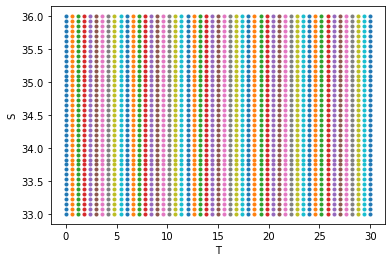

In [9]:
plt.plot(Tgrid, Sgrid, '.');
plt.xlabel('T')
plt.ylabel('S')

T and S provide a nice 2D way of representing the properties of any water parcel (water mass) in the ocean. Density is a function of both of them, and in a rotated sense provides one alternative new axis. 

If we changed water from T_1,S_1 to a new T_2, S_2 (by mixing way with some T_o, S_o) such that the density changed then we would have had to provide mechanical energy to the system to mix (T_2 = 0.5(T_1+ T_0), etc.), as a change in density corresponds to a change in potential energy (heavy things at same height as lighter things have more potential energy). 

However, if we moved in a direction such that density of the new position is the same as the previous then we could move water there without changing density. This would not be associated with an energetic cost, since the potential energy of new system would be same as old one. 

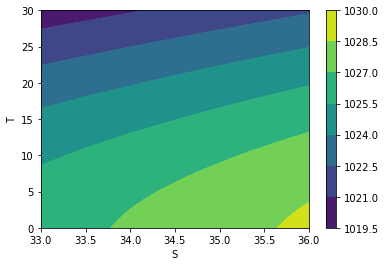

In [16]:
plt.contourf(Sgrid, Tgrid, Density)
plt.xlabel('S')
plt.ylabel('T')
plt.colorbar()

Even though two water masses have the same density, they can have very different T,S properties. We would like to have some way to quantify this, basically have some number that increases in the direction along the density contour lines (density changes across the contour lines in above plots). This is what the variable spice was defined for.

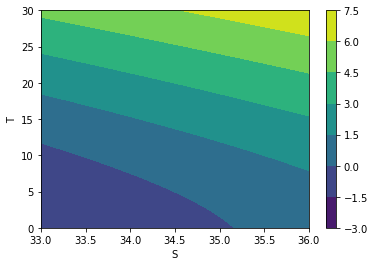

In [18]:
plt.contourf(Sgrid, Tgrid, Spice)
plt.xlabel('S')
plt.ylabel('T')
plt.colorbar()

<a list of 5 text.Text objects>

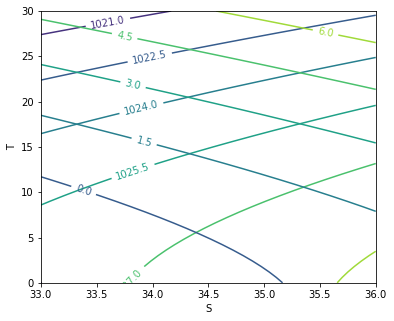

In [27]:
fig, ax = plt.subplots(figsize=(6,5))

Dplt = ax.contour(Sgrid, Tgrid, Density)
Splt = ax.contour(Sgrid, Tgrid, Spice)
plt.xlabel('S')
plt.ylabel('T')
ax.clabel(Dplt)
ax.clabel(Splt)


While not perfectly orthogonal (like T and S are), it gives some quantitative number that varies along density contours. 

So we had T and S to mark a water mass, and now we can use density and spice to mark it uniquely.

See figures 1-5 in https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.547.8890&rep=rep1&type=pdf .